<a href="https://colab.research.google.com/github/sayaliph18/Fashion_Class_Classififcation/blob/main/Fashion_Class_Classififcation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fashion class classification**

#Problem Statement and Business Case

Fashion training set consists of 70,000 images divided into 60,000 training and 10,000 testing samples. Dataset sample consists of 28x28 grayscale image, associated with a label from 10 classes.

The 10 classes are as follows:  
0 => T-shirt/top

1 => Trouser

2 => Pullover

3 => Dress

4 => Coat

5 => Sandal

6 => Shirt

7 => Sneaker

8 => Bag

9 => Ankle boot

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255.

![image.png](attachment:image.png)

#Import the data

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns7

In [5]:
fashion_train_df = pd.read_csv('/content/fashion-mnist_train.csv',sep = ',')
fashion_test_df = pd.read_csv('/content/fashion-mnist_test.csv',sep = ',')

#Visualization of the dataset

In [6]:
fashion_train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
fashion_train_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
59995,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,1,0,0,0,0,0,0,0,0,0,...,73,0,0,0,0,0,0,0,0,0
59997,8,0,0,0,0,0,0,0,0,0,...,160,162,163,135,94,0,0,0,0,0
59998,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59999,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
fashion_test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
fashion_test_df.tail()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
9995,0,0,0,0,0,0,0,0,0,0,...,32,23,14,20,0,0,1,0,0,0
9996,6,0,0,0,0,0,0,0,0,0,...,0,0,0,2,52,23,28,0,0,0
9997,8,0,0,0,0,0,0,0,0,0,...,175,172,172,182,199,222,42,0,1,0
9998,8,0,1,3,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9999,1,0,0,0,0,0,0,0,140,119,...,111,95,75,44,1,0,0,0,0,0


In [10]:
fashion_train_df.shape

(60000, 785)

In [11]:
fashion_test_df.shape

(10000, 785)

In [12]:
training = np.array(fashion_train_df,dtype = 'float32')

In [13]:
testing = np.array(fashion_test_df,dtype = 'float32')

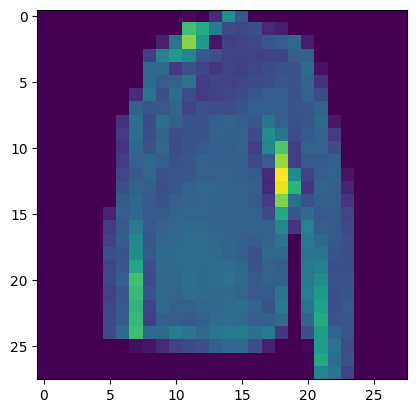

In [18]:
plt.imshow( training[88,1:].reshape((28,28)) )

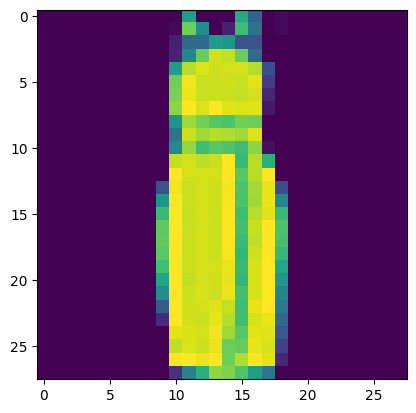

In [19]:
plt.imshow( training[99,1:].reshape((28,28)) )

3.0

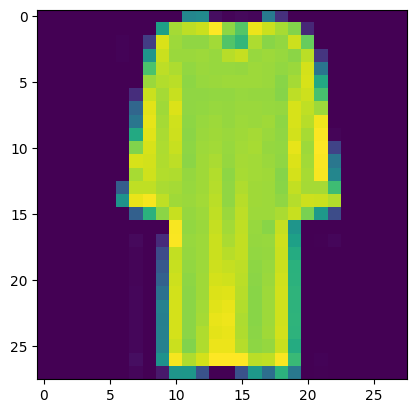

In [21]:
import random
i = random.randint(1,60000)
plt.imshow( training[i,1:].reshape((28,28)) )
label = training[i,0]
label

In [ ]:
"""The 10 classes are as follows:
0 => T-shirt/top
1 => Trouser
2 => Pullover
3 => Dress
4 => Coat
5 => Sandal
6 => Shirt
7 => Sneaker
8 => Bag
9 => Ankle boot"""

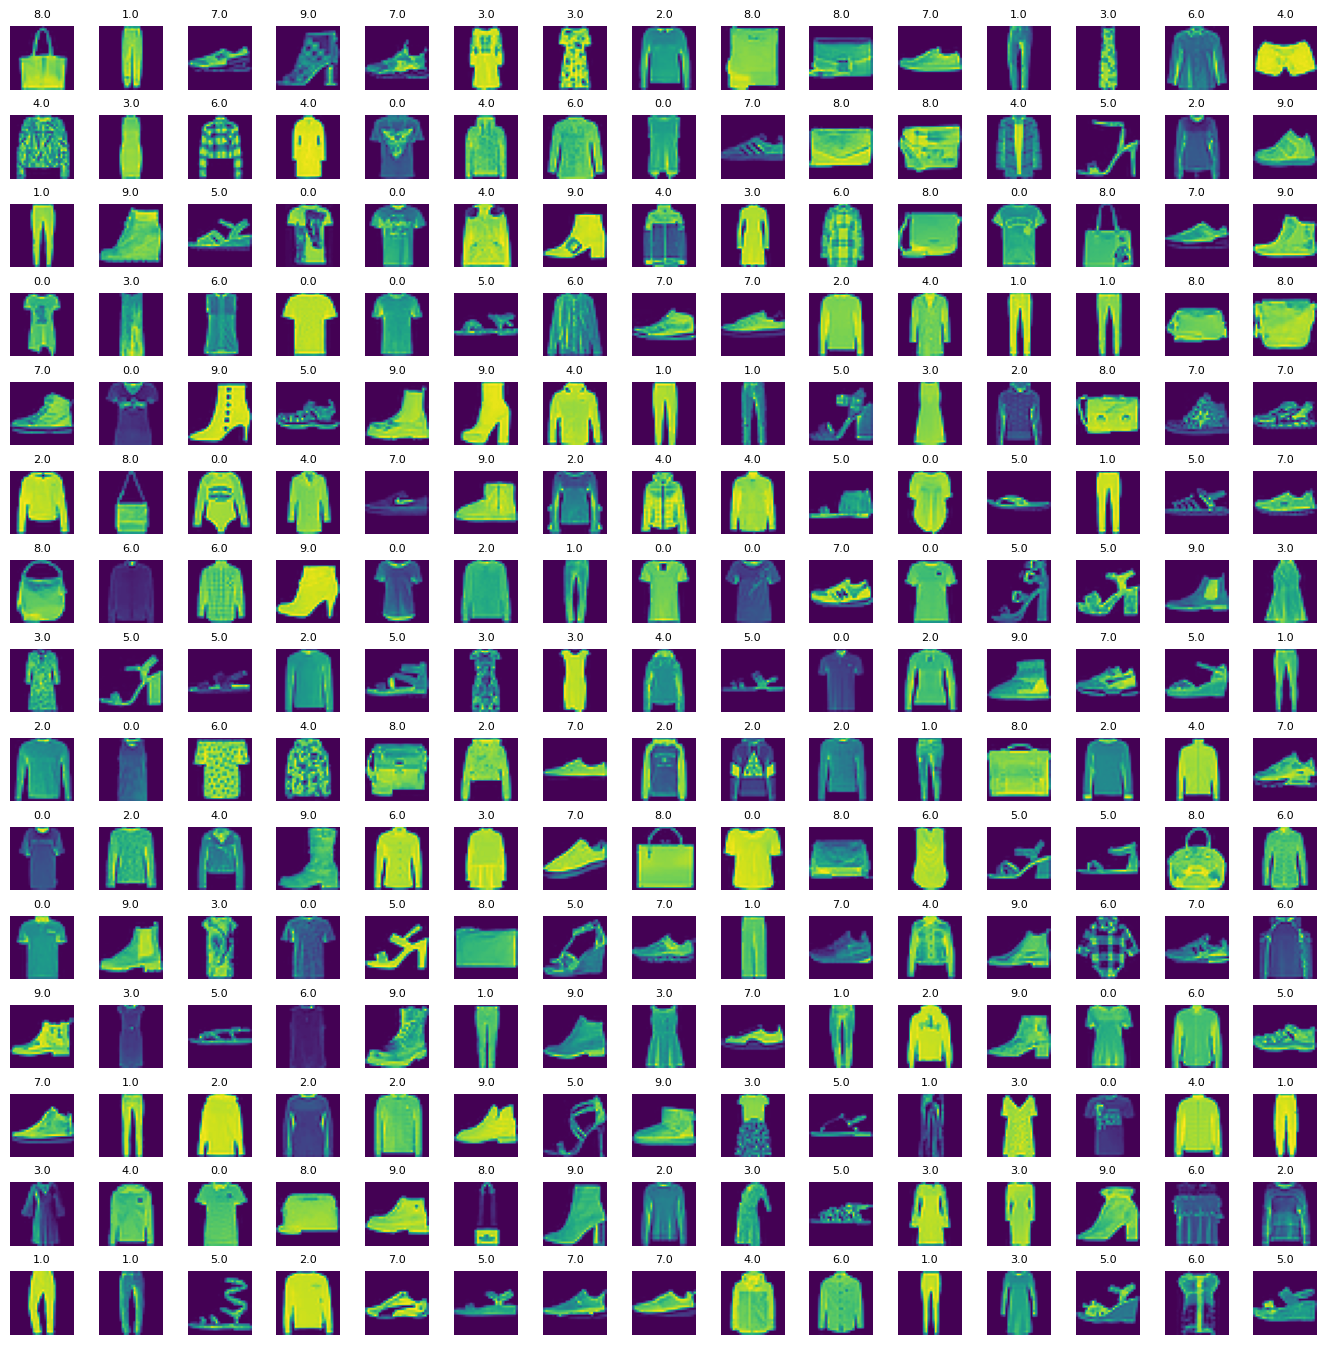

In [22]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid
W_grid = 15
L_grid = 15

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (17,17))

axes = axes.ravel() # flaten the 15 x 15 matrix into 225 array

n_training = len(training) # get the length of the training dataset

# Select a random number from 0 to n_training
for i in np.arange(0, W_grid * L_grid): # create evenly spaces variables

    # Select a random number
    index = np.random.randint(0, n_training)
    # read and display an image with the selected index
    axes[i].imshow( training[index,1:].reshape((28,28)) )
    axes[i].set_title(training[index,0], fontsize = 8)
    axes[i].axis('off')

plt.subplots_adjust(hspace=0.4)

#Training the model

In [23]:
X_train = training[:,1:]/255
y_train = training[:,0]

In [24]:
X_test = testing[:,1:]/255
y_test = testing[:,0]

In [25]:
from sklearn.model_selection import train_test_split
X_train,X_validate,y_train,y_validate = train_test_split(X_train,
                                                         y_train,
                                                         test_size = 0.2,
                                                         random_state = 12345)

In [26]:
X_train = X_train.reshape(X_train.shape[0], *(28, 28, 1))
X_test = X_test.reshape(X_test.shape[0], *(28, 28, 1))
X_validate = X_validate.reshape(X_validate.shape[0], *(28, 28, 1))


In [27]:
X_train.shape

(48000, 28, 28, 1)

In [28]:
X_validate.shape

(12000, 28, 28, 1)

In [29]:
X_test.shape

(10000, 28, 28, 1)

In [30]:
import keras

In [31]:
from keras import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

In [32]:
cnn_model = Sequential()

In [33]:
cnn_model.add(Conv2D(32,3,3,input_shape = (28,28,1), activation='relu'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [34]:
cnn_model.add(MaxPooling2D(pool_size=(2,2)))

In [35]:
cnn_model.add(Flatten())

In [42]:
cnn_model.add(Dense(32, activation ='relu'))


In [43]:
cnn_model.add(Dense(10,activation= 'sigmoid'))

In [45]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(learning_rate=0.001),metrics =['accuracy'])

In [47]:
epochs = 50

history = cnn_model.fit(X_train,
                        y_train,
                        batch_size = 512,
                        epochs = epochs,
                        verbose = 1,
                        validation_data = (X_validate, y_validate))



Epoch 1/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 27ms/step - accuracy: 0.4121 - loss: 1.8556 - val_accuracy: 0.7175 - val_loss: 0.7905
Epoch 2/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.7337 - loss: 0.7384 - val_accuracy: 0.7681 - val_loss: 0.6341
Epoch 3/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 26ms/step - accuracy: 0.7769 - loss: 0.6141 - val_accuracy: 0.7956 - val_loss: 0.5653
Epoch 4/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.7990 - loss: 0.5536 - val_accuracy: 0.8110 - val_loss: 0.5249
Epoch 5/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 2s 24ms/step - accuracy: 0.8119 - loss: 0.5164 - val_accuracy: 0.8217 - val_loss: 0.4986
Epoch 6/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 25ms/step - accuracy: 0.8226 - loss: 0.4900 - val_accuracy: 0.8322 - val_loss: 0.4785
Epoch 7/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 41ms/step - accuracy: 0.8284 - loss: 0.4751 - val_accuracy: 0.8315 - val_loss: 0.4688
Epoch 8/50
94/94 ━━━━━━━━━━━━━━━━━━━━ 3s 29ms/step - accuracy: 0.8337 - loss: 0.4568 - val_accuracy: 0.8363 - v

#Evaluating the model

In [48]:
evaluation = cnn_model.evaluate(X_test, y_test)
print('Test Accuracy : {:.3f}'.format(evaluation[1]))

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8705 - loss: 0.3472
Test Accuracy : 0.874


In [67]:
predictions = cnn_model.predict(X_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


In [68]:
predicted_classes = np.argmax(predictions, axis=1)

# Ensure that the predicted_classes is in integer format
predicted_classes = predicted_classes.astype(int)

In [69]:
predicted_classes

array([0, 1, 2, ..., 8, 8, 1])

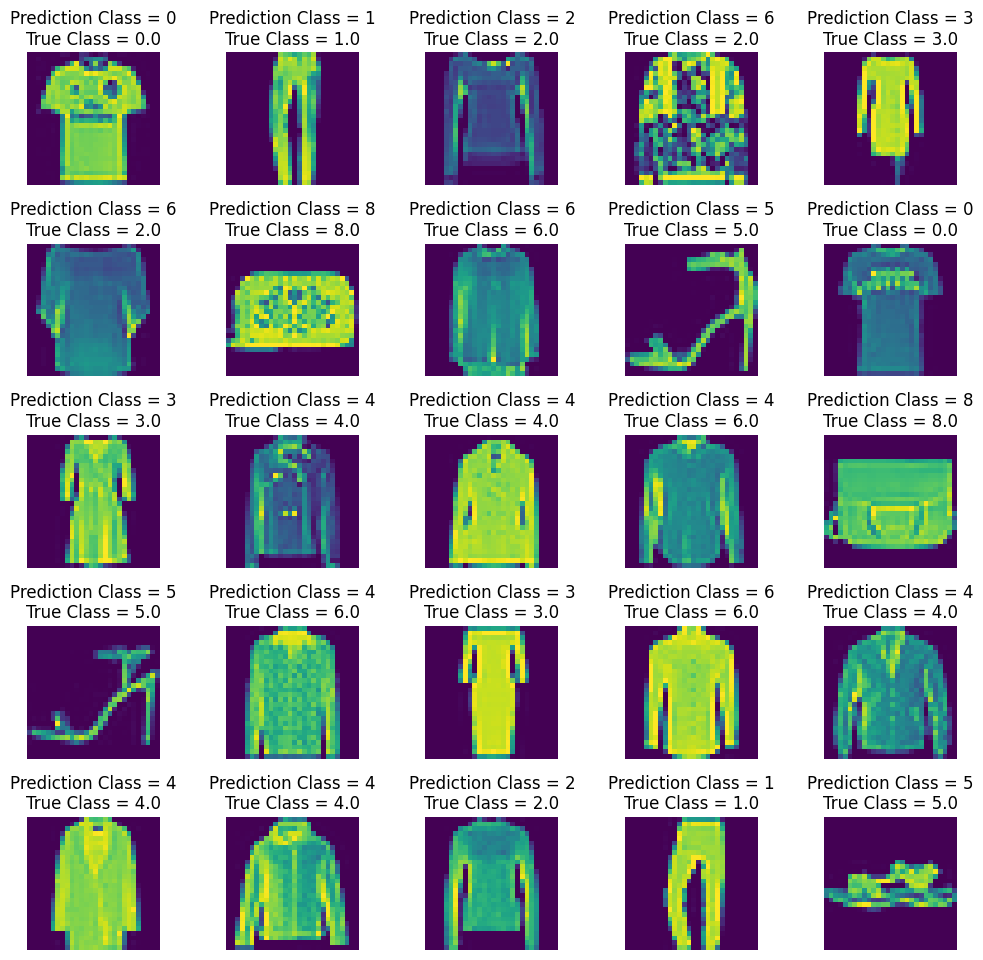

In [70]:
L = 5
W = 5
fig, axes = plt.subplots(L, W, figsize=(12, 12))
axes = axes.ravel()  # Flatten the 2D array of axes to 1D

for i in np.arange(0, L * W):
    axes[i].imshow(X_test[i].reshape(28, 28))  # Specify colormap for better visibility if needed
    axes[i].set_title(
        "Prediction Class = {pred}\nTrue Class = {true}".format(pred=(predicted_classes[i]), true=(y_test[i]))
    )
    axes[i].axis('off')

plt.subplots_adjust(wspace=0.5);

<Axes: >

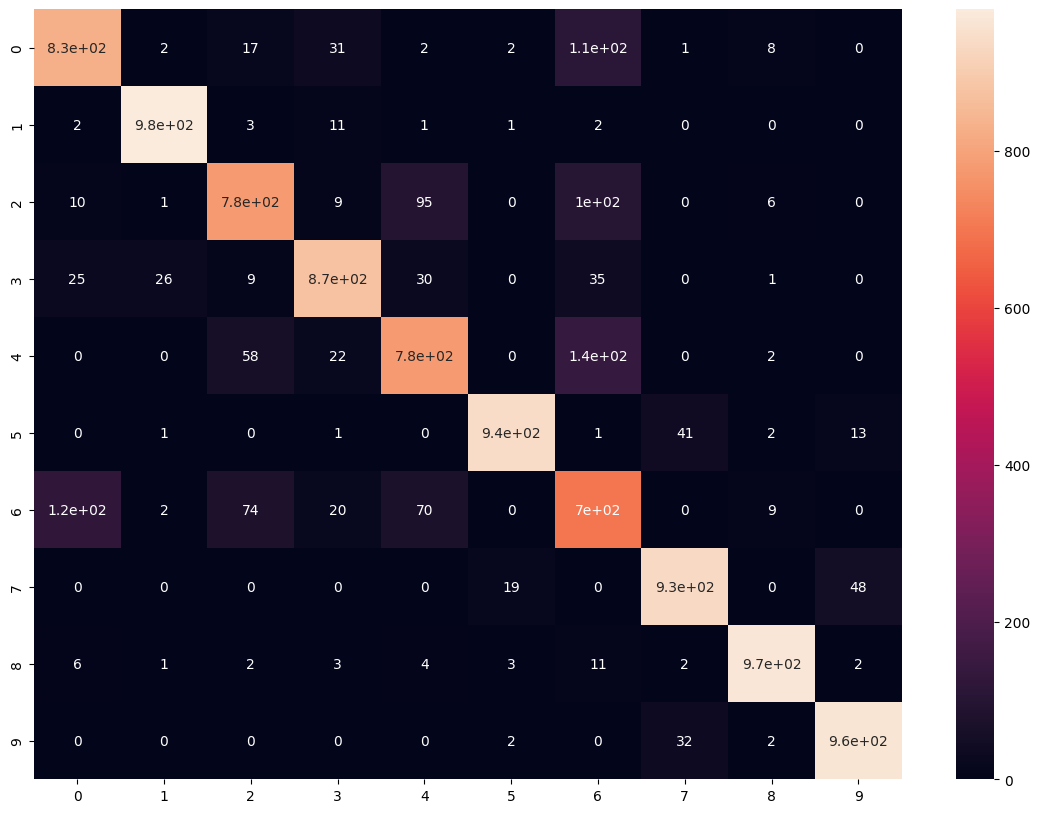

In [71]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, predicted_classes)
plt.figure(figsize = (14,10))
sns.heatmap(cm, annot=True)
# Sum the diagonal element to get the total true correct values

In [72]:
from sklearn.metrics import classification_report

num_classes = 10
target_names = ["Class {}".format(i) for i in range(num_classes)]

print(classification_report(y_test, predicted_classes, target_names = target_names))

              precision    recall  f1-score   support

     Class 0       0.83      0.83      0.83      1000
     Class 1       0.97      0.98      0.97      1000
     Class 2       0.83      0.78      0.80      1000
     Class 3       0.90      0.87      0.89      1000
     Class 4       0.79      0.78      0.79      1000
     Class 5       0.97      0.94      0.96      1000
     Class 6       0.64      0.70      0.67      1000
     Class 7       0.92      0.93      0.93      1000
     Class 8       0.97      0.97      0.97      1000
     Class 9       0.94      0.96      0.95      1000

    accuracy                           0.87     10000
   macro avg       0.88      0.87      0.88     10000
weighted avg       0.88      0.87      0.88     10000

